# Image Segmentation using K-Means

## Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Building our model

In [ ]:
im =  cv2.imread("WhatsApp Image 2021-09-30 at 1.21.47 PM.jpeg") # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1600, 1200, 3)


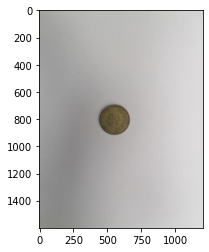

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(1920000, 3)


## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dominant_colors = 3

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[156.01055667 155.08638977 154.71857906]
 [200.92817618 199.00426526 198.75119218]
 [ 95.97821982  84.41483067  58.19415838]]


In [ ]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

In [ ]:
print(centers)

[[156 155 154]
 [200 199 198]
 [ 95  84  58]]


#### Q. Plot what all colors are these ?

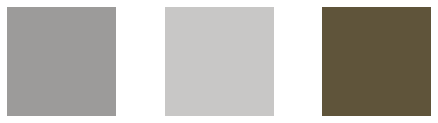

In [ ]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,3,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting our original image

In [ ]:
new_img = np.zeros((1600* 1200, 3),dtype='uint8')
print(new_img.shape)

(1920000, 3)


In [ ]:
colors

[array([156, 155, 154], dtype=uint8),
 array([200, 199, 198], dtype=uint8),
 array([95, 84, 58], dtype=uint8)]

In [ ]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

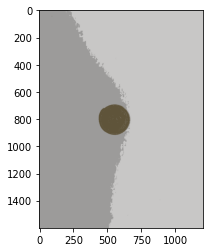

In [ ]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()